# [Participación en clase 11] Ejercicio mínimos cuadrados
## Resolución Prueba 02
- Nombre: Anthony Contreras
- Fecha: 26/01/2025
- Curso: Métodos Númericos GR1CC

# Mínimos Cuadrados
- Interpole los siguientes conjuntos de datos con la función correspondiente.


In [42]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Conjunto de Datos 1

In [43]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

In [44]:
from src import ajustar_min_cuadrados
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

def der_parcial_2(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**2 for xi in xs)
    c_1 = sum(xs)
    c_0 = len(xs)
    c_ind = sum(ys)
    return (c_2, c_1, c_0, c_ind)


def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**3 for xi in xs)
    c_1 = sum(xi**2 for xi in xs)
    c_0 = sum(xs)
    c_ind = sum(xi * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float, float]:
    c_2 = sum(xi**4 for xi in xs)
    c_1 = sum(xi**3 for xi in xs)
    c_0 = sum(xi**2 for xi in xs)
    c_ind = sum(xi**2 * yi for xi, yi in zip(xs, ys))
    return (c_2, c_1, c_0, c_ind)

pars1 = ajustar_min_cuadrados(xs1, ys1, gradiente=[der_parcial_0, der_parcial_1, der_parcial_2])
x = symbols('x')
equation = Eq(pars1[0] * x**2 + pars1[1] * x + pars1[2], 2.25)
solutions = solve(equation, x)
for solution in solutions:
    print(f"x = {solution.evalf()}")


[01-26 20:06:56][INFO] Se ajustarán 3 parámetros.
[01-26 20:06:56][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-26 20:06:56][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
x = -0.948805441087225
x = 1.50369543945971


Justamente tenia esta idea en el examen pero no me funciono, mi error fue en el der_parcial_2 sumaba en un ciclo para cada valor lo cual era erroneo.

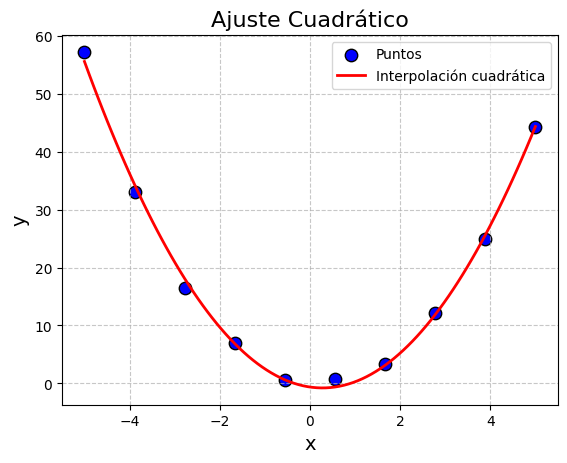

In [45]:
# Datos
x1 = np.linspace(-5, 5, 100)
y1 = pars1[0] * x1**2 + pars1[1] * x1 + pars1[2]

# Graficar
plt.scatter(xs1, ys1, color='blue', label="Puntos", edgecolors='black', s=80)
plt.plot(x1, y1, 'r-', label="Interpolación cuadrática", linewidth=2)

# Personalización
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Ajuste Cuadrático", fontsize=16)
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar
plt.show()

In [46]:
def cuadratica(x, pars):
    a2, a1, a0 = pars
    return a2 * x**2 + a1 * x + a0

def ajustar_min_cuadrados(xs, ys):
    A = np.vstack([np.square(xs), xs, np.ones(len(xs))]).T
    pars, _, _, _ = np.linalg.lstsq(A, ys, rcond=None)
    return pars

pars = ajustar_min_cuadrados(xs1, ys1)
a2, a1, a0 = pars

y_2_25 = cuadratica(2.25, pars)
y_neg_2_25 = cuadratica(-2.25, pars)

print(f"a2 = {a2}")
print(f"a1 = {a1}")
print(f"a0 = {a0}")
print(f"y(2.25) = {y_2_25}")
print(f"y(-2.25) = {y_neg_2_25}")

a2 = 2.024410482925084
a1 = -1.1233251295755444
a0 = -0.6382556172537845
y(2.25) = 7.0828409110094785
y(-2.25) = 12.137803994099427


### Conjunto de Datos 2

In [47]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

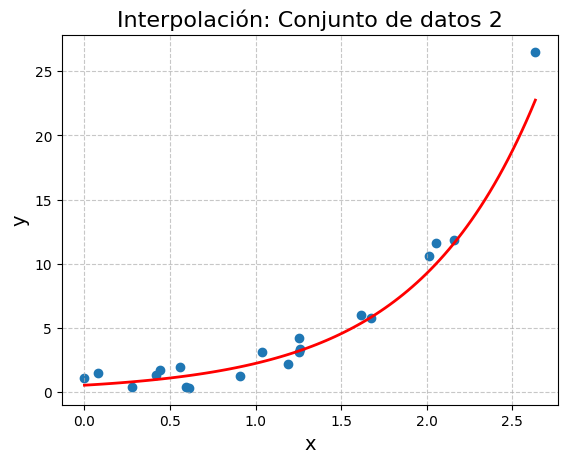

In [48]:
def exponencial(x, pars):
    a, b = pars
    return a * np.exp(b * x)

def ajustar_exponencial(xs, ys):
    log_ys = np.log(ys)
    A = np.vstack([xs, np.ones(len(xs))]).T
    b, log_a = np.linalg.lstsq(A, log_ys, rcond=None)[0]
    a = np.exp(log_a)

    return a, b

pars = ajustar_exponencial(xs2, ys2)

x = np.linspace(min(xs2), max(xs2), 100)
y = exponencial(x, pars)

# Graficar ajuste exponencial
plt.plot(x, y, color="red", linewidth=2)
plt.scatter(xs2, ys2)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.title("Interpolación: Conjunto de datos 2", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [49]:
a, b = pars

y_5 = exponencial(5, pars)
y_1 = exponencial(1, pars)

print(f"a = {a}")
print(f"b = {b}")
print(f"y(5) = {y_5}")
print(f"y(1) = {y_1}")

a = 0.5440855388147082
b = 1.4171603667055415
y(5) = 650.1174439111649
y(1) = 2.2445646053759507


# Conclusiones
- Uso del Método de Mínimos Cuadrados: El ajuste de los parámetros aa y bb se realiza mediante la resolución de un sistema de ecuaciones lineales con el método de mínimos cuadrados. Este método es eficiente para encontrar los mejores parámetros en el sentido de minimizar el error cuadrático entre los valores ajustados y los datos reales. En este caso, se usa la función np.linalg.lstsq, que es apropiada para resolver este tipo de problemas.
- Una vez encontrados los parámetros aa y bb, se genera una curva ajustada para los valores de xx. Esto permite visualizar cómo el modelo exponencial se adapta a los datos observados.